## Agar plate segmentation

https://www.anyrgb.com/en-clipart-owybh

In [2]:
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lenono\Documents\StudyCode\JuliaCon23_ImageProcessingWorkshop`


In [9]:
using Images, FileIO


In this demonstration, we will segment an image using the watershed algorithm and learn how it segments those images. We will using ImageSegmentation.jl which provides implementation of several image segmentation algorithms.

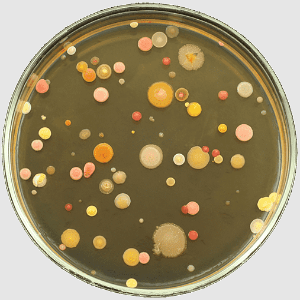

In [7]:
img = load("assets/agarplate.png")
img_small = imresize(img, (300,300))

In [52]:
bw = Gray.(img_small) .> 0.5
bw_transform = feature_transform(bw)
dist = 1 .- distance_transform(bw_transform)

300×300 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

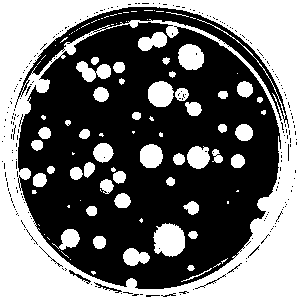

In [28]:
Gray.(dist)

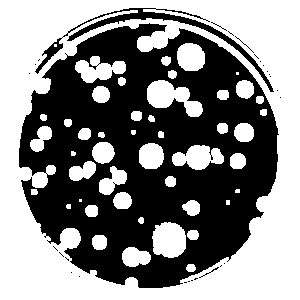

In [73]:
dist_new = mapwindow(maximum, dist, (3,3))
Gray.(dist_new)

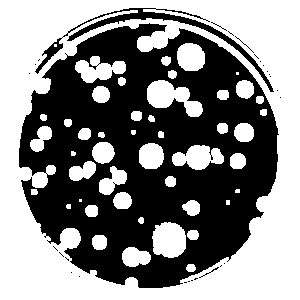

In [74]:
dist_trans = dist_new .> 0.5
Gray.(dist_trans)

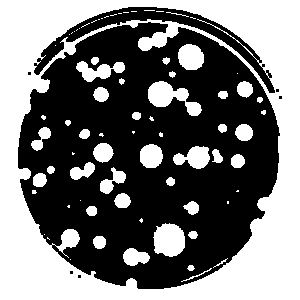

In [76]:
Gray.(erode(dist_trans))

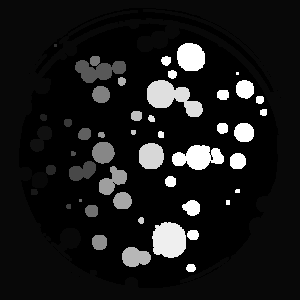

In [77]:
dist_trans = dist_new .> 0.5
markers = label_components(dist_trans)
Gray.(markers/32.0) # each of the blobs is slightly differently marked by label_components from 1 to 64

In [78]:
segments = watershed(dist_trans, markers)

Segmented Image with:
  labels map: 300×300 Matrix{Int64}
  number of labels: 49

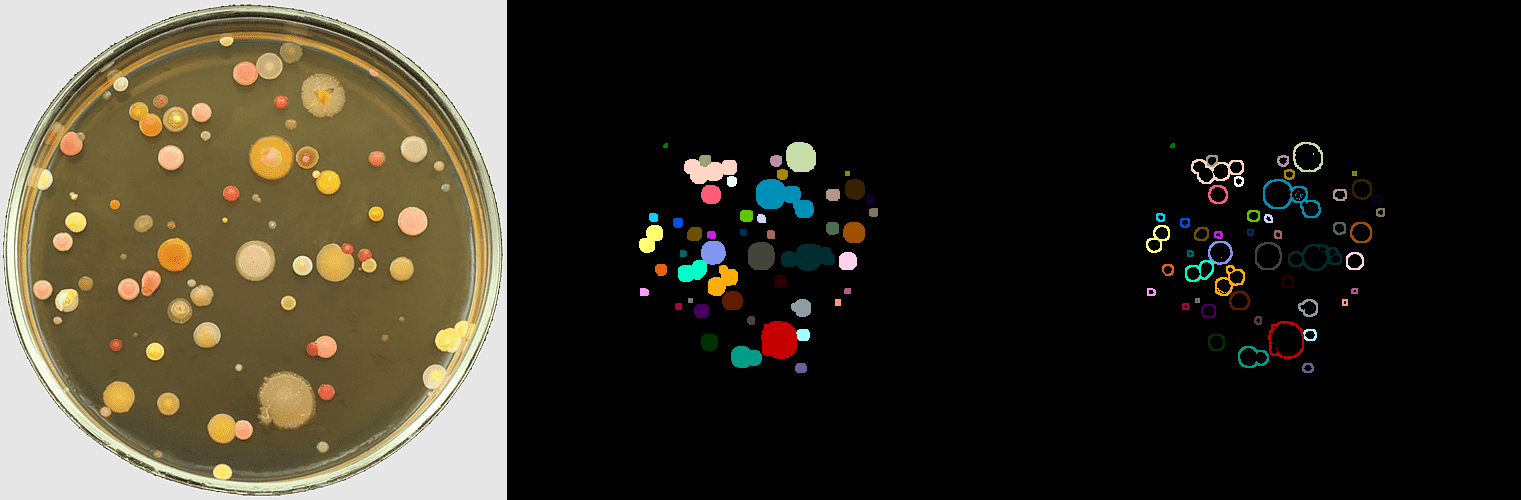

In [79]:
labels = labels_map(segments)
colored_labels = Images.IndirectArray(labels, distinguishable_colors(maximum(labels)))
masked_colored_labels = colored_labels .* (1 .- bw)
mosaic(img, colored_labels, masked_colored_labels; nrow=1)